In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("credit_card_churn_2.0.csv")

# Understanding The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_status                   1000 non-null   object 
 1   Customer_Age                      1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Family_members                    1000 non-null   int64  
 4   Education_Level                   1000 non-null   object 
 5   Marital_Status                    1000 non-null   object 
 6   Income_Category                   1000 non-null   object 
 7   Card_Category                     1000 non-null   object 
 8   Tenure                            1000 non-null   int64  
 9   Months_on_book                    1000 non-null   int64  
 10  no_of_bank_product_with_customer  1000 non-null   int64  
 11  Months_Inactive                   1000 non-null   int64  
 12  Contact

In [4]:
df.head(4)

,customer_status,Customer_Age,Gender,Family_members,Education_Level,Marital_Status,Income_Category,Card_Category,Tenure,Months_on_book,...,Contacts_Count,Credit_Limit,Total_Revolving_Bal,unused_balance,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,2,39,...,3,12691,777,11914,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,1,44,...,2,8256,864,7392,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,8,36,...,0,3418,0,3418,2.594,1887,20,2.333,0.000,1
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,1,34,...,1,3313,2517,796,1.405,1171,20,2.333,0.760,1


In [5]:
# basic info about the data
df.describe()

,Customer_Age,Family_members,Tenure,Months_on_book,no_of_bank_product_with_customer,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,unused_balance,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn_Flag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,48.536000,2.286000,5.066000,37.440000,4.26800,2.26400,2.010000,10023.768000,1339.844000,8683.92400,0.881372,1468.451000,34.480000,0.799319,0.270367,0.62200
std,8.001921,1.296103,2.927835,7.928257,1.33415,0.97942,1.031971,9259.441169,773.090548,9261.09013,0.362040,444.129013,11.620871,0.454113,0.264585,0.48513
min,26.000000,0.000000,0.000000,13.000000,1.00000,0.00000,0.000000,1438.000000,0.000000,24.00000,0.256000,510.000000,10.000000,0.059000,0.000000,0.00000
25%,43.000000,1.000000,2.000000,34.000000,3.00000,1.75000,2.000000,3020.250000,864.000000,1478.50000,0.646000,1210.500000,26.000000,0.519750,0.055000,0.00000
50%,48.000000,2.000000,5.000000,36.000000,4.00000,2.00000,2.000000,6243.000000,1495.500000,5039.00000,0.797000,1419.000000,33.000000,0.696500,0.175500,1.00000
75%,54.000000,3.000000,8.000000,43.000000,5.00000,3.00000,3.000000,14251.000000,1911.250000,12539.00000,1.012750,1679.250000,41.000000,0.947000,0.463250,1.00000
max,73.000000,5.000000,10.000000,56.000000,6.00000,6.00000,4.000000,34516.000000,2517.000000,34516.00000,3.397000,4311.000000,78.000000,3.714000,0.987000,1.00000


In [6]:
# no null values as we saw in sql 
df.isnull().sum()

customer_status                     0
Customer_Age                        0
Gender                              0
Family_members                      0
Education_Level                     0
Marital_Status                      0
Income_Category                     0
Card_Category                       0
Tenure                              0
Months_on_book                      0
no_of_bank_product_with_customer    0
Months_Inactive                     0
Contacts_Count                      0
Credit_Limit                        0
Total_Revolving_Bal                 0
unused_balance                      0
Total_Amt_Chng_Q4_Q1                0
Total_Trans_Amt                     0
Total_Trans_Ct                      0
Total_Ct_Chng_Q4_Q1                 0
Avg_Utilization_Ratio               0
Churn_Flag                          0
dtype: int64

we already cleaned data in mysql workbench so now we are moving to EDA analyses 

# Exploratory data analysis (EDA) 

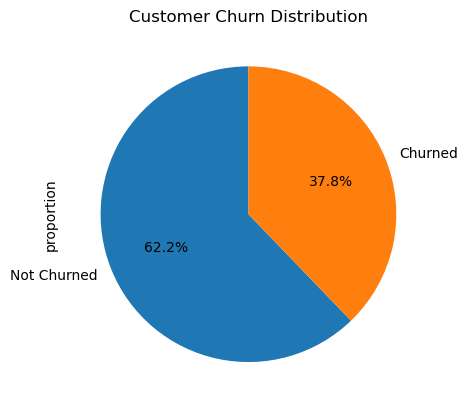

In [7]:
# What percentage of customers have churned?
df['Churn_Flag'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',  labels=['Not Churned', 'Churned'], startangle=90)
plt.title('Customer Churn Distribution')
plt.show()

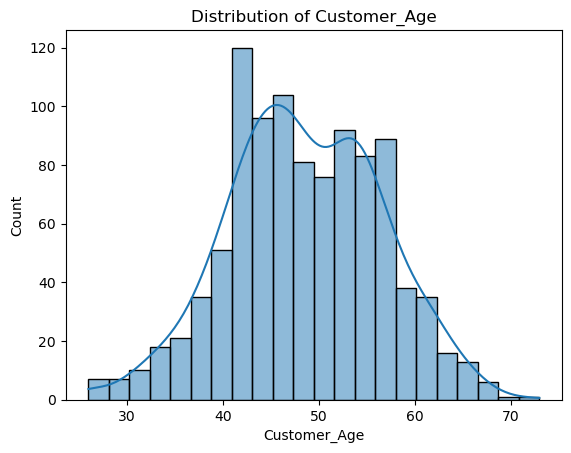

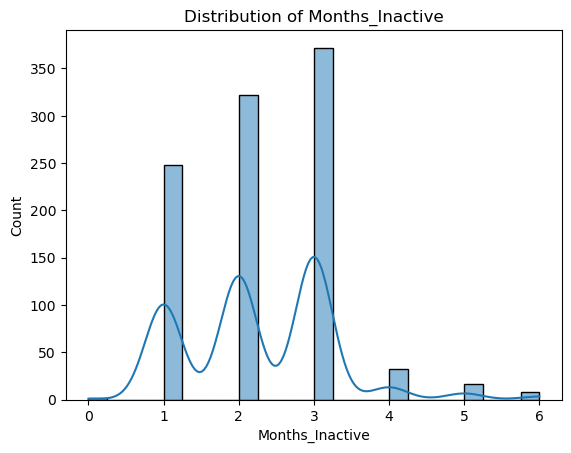

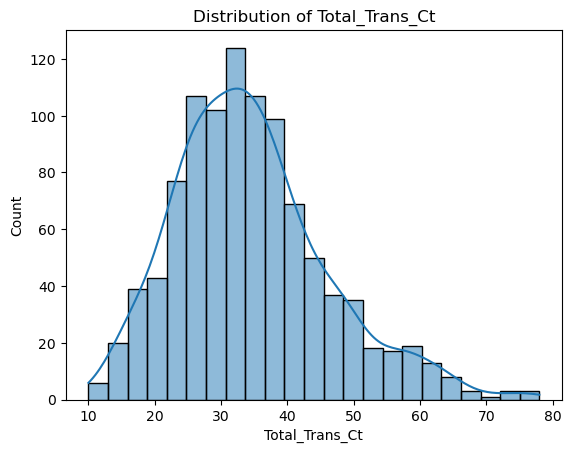

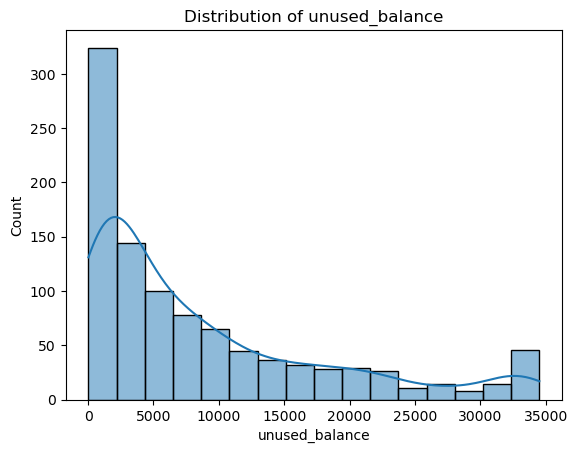

In [8]:
# What does the distribution of key features look like?
list = ['Customer_Age', 'Months_Inactive', 'Total_Trans_Ct', 'unused_balance']

for i in list:
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

mostly customer who have credit card are age between 40 - 60  And are inactive for 3 months with over 30 to 40 transaction in a month  and have left balance in between 0 to 5000 

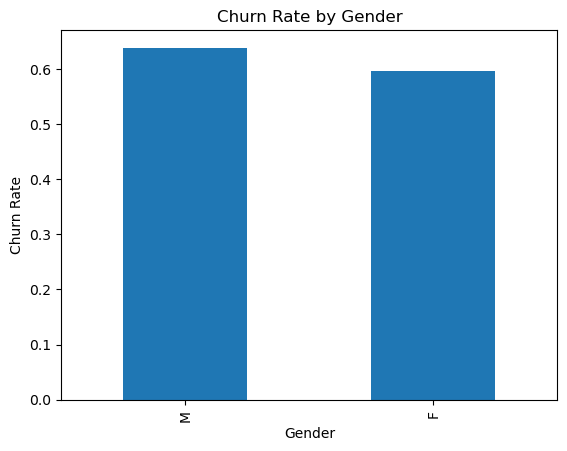

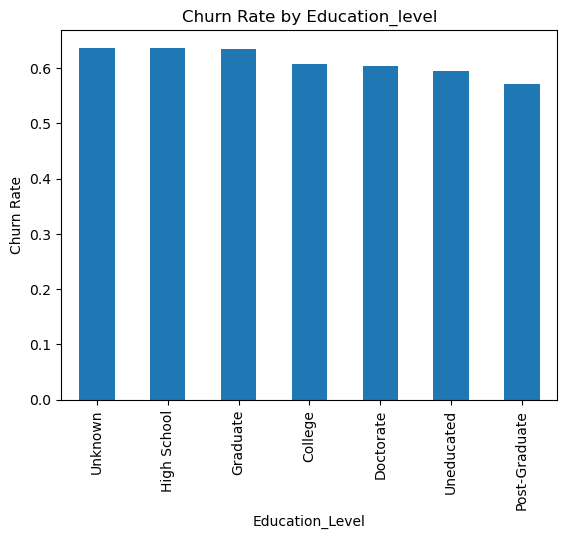

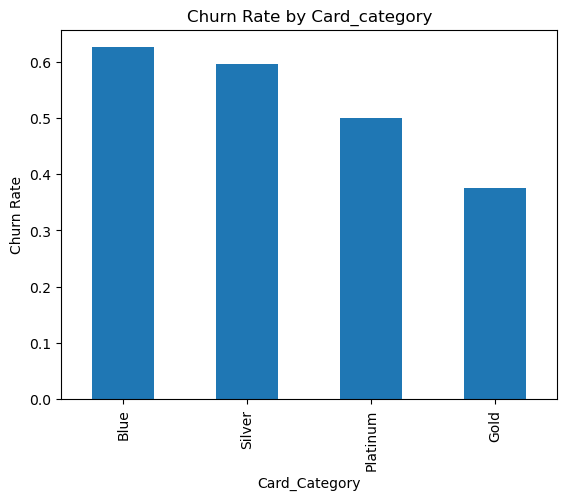

In [9]:
# What is the churn rate by gender, education, card category, etc.?
List2  = ['Gender', 'Education_Level', 'Card_Category']

for i in List2:
    churn_rate = df.groupby(i)['Churn_Flag'].mean().sort_values(ascending=False)
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {i.capitalize()}')
    plt.ylabel('Churn Rate')
    plt.show()

Churn rate are mostly same in gender and education level (in sql female and more educated person have most numbers of churn but in average wise they all are at same level ) , anyways blue has most churn rate followed by silver and platinum credit card 

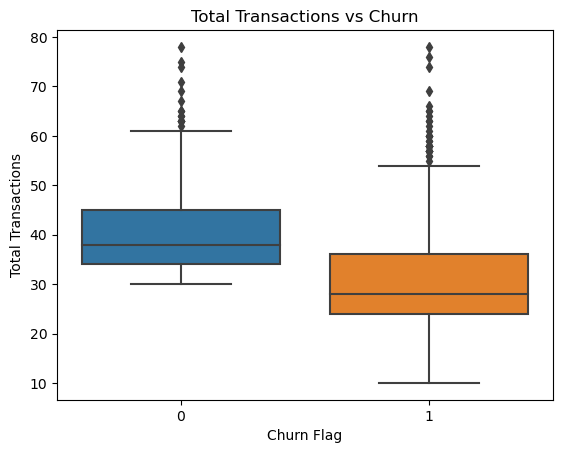

In [10]:
# Do customers with fewer transactions churn more ?
sns.boxplot(x='Churn_Flag', y='Total_Trans_Ct', data=df)
plt.title('Total Transactions vs Churn')
plt.xlabel('Churn Flag')
plt.ylabel('Total Transactions')
plt.show()

transaction count are lower in churn people than the other customers who don't churn , so they don't utilize thier credit card more often and that't the reason they  decide to churn , mean they have some issue with transactions 

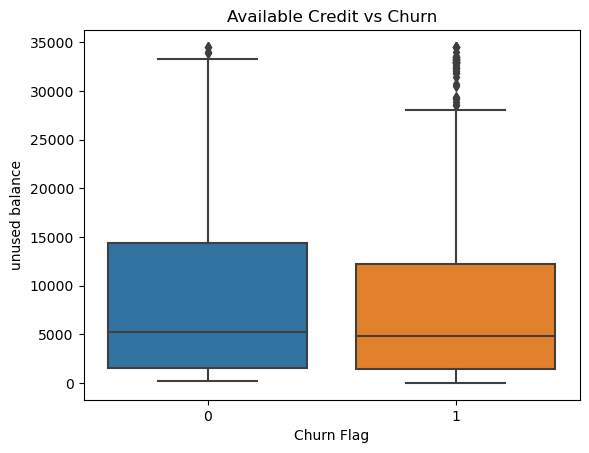

In [11]:
# Is churn related to balance or credit usage?
sns.boxplot(x='Churn_Flag', y='unused_balance', data=df)
plt.title('Available Credit vs Churn')
plt.xlabel('Churn Flag')
plt.ylabel('unused balance')
plt.show()

NO balance is not a key factor of churn rate there are many people who have more than 3000 in thier balance which they never used so mainy because of transaction they left. (outliers are more than expected)

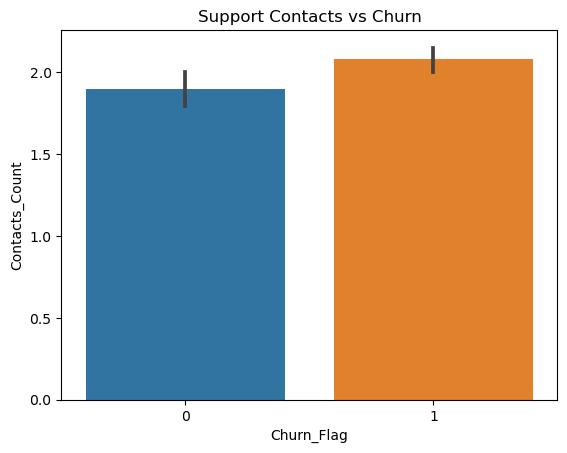

In [12]:
#  Do churned customers contact support more?
sns.barplot(x='Churn_Flag', y='Contacts_Count', data=df)
plt.title('Support Contacts vs Churn')
plt.show()

Yes churn people contact more than others but the grap is not that much , also  here people who not churn are also contact the bank , so what's the possible reason? maybe traansaction issue ? 

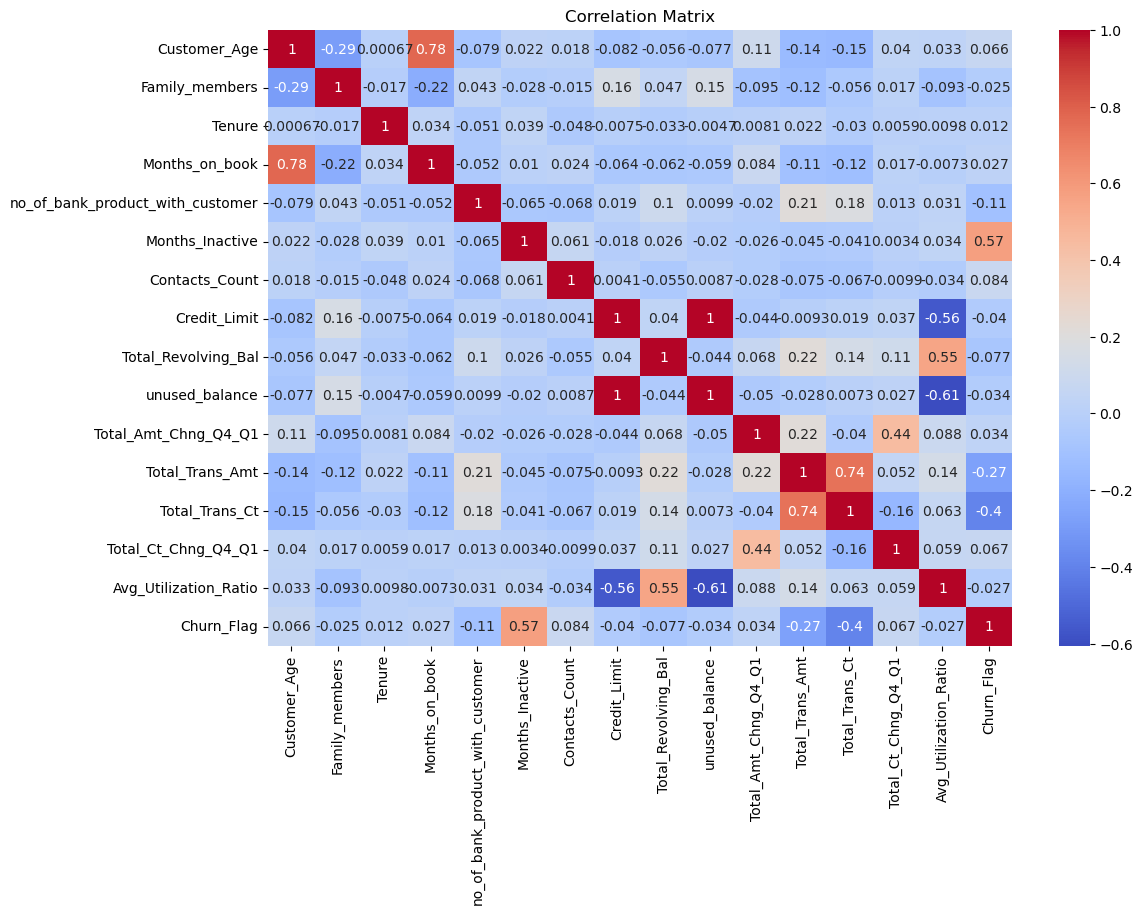

In [13]:
# Features that are strongly correlated with churn (Correlation Heatmap)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

key insights 

1. Strongest Negative Correlations with Churn
Total_Revolving_Bal and Total_Trans_Amt  show moderate negative correlations, suggesting customers with higher balances and transaction amounts are less likely to churn

2. Potential Positive Correlations
Credit_Lim shows a relatively strong positive coefficient , which might indicate customers with higher credit limits are more likely to churn 

3. Customer Engagement Factors
Contact_Count shows mixed small correlations (both positive and negative values), suggesting the relationship between customer service contacts and churn is complex

4. Behavioral Patterns
Total_Tran_Amt and Total_Tran_Q1  both show customers who transact more are less likely to churn

5. Unexpected Findings
The positive correlation between Credit_Lim and churn contradicts typical industry patterns where higher limits usually indicate valuable customers - this warrants deeper investigation

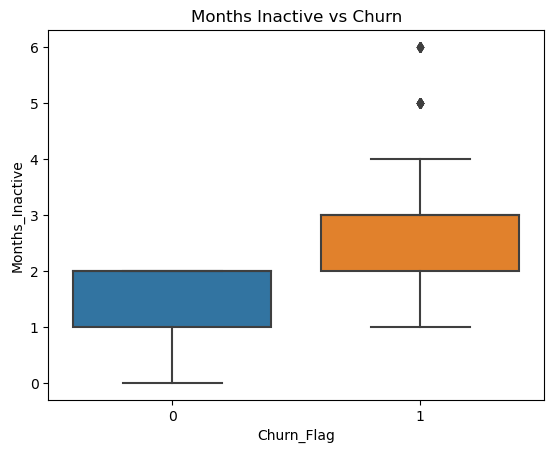

In [14]:
# Does higher inactivity relate to churn?
sns.boxplot(x='Churn_Flag', y='Months_Inactive', data=df)
plt.title('Months Inactive vs Churn')
plt.show()

Yes who are inactive are the one who churn more (and it's make totally sense)

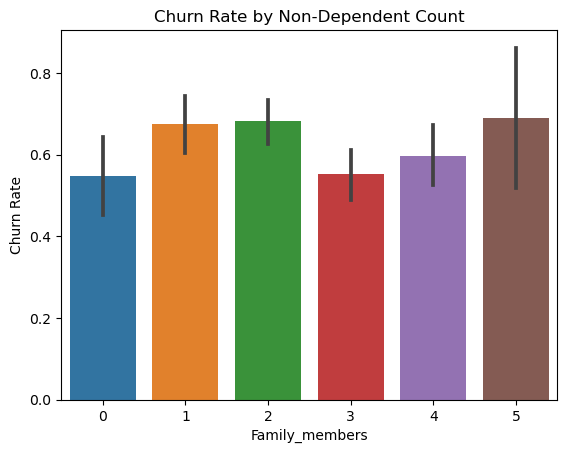

In [15]:
#  Are single or family customers more likely to churn?
sns.barplot(x='Family_members', y='Churn_Flag', data=df)
plt.title('Churn Rate by Non-Dependent Count')
plt.ylabel('Churn Rate')
plt.show()

it's unexpected but the churn rate is higher in family person than the single one , they  must use other bank credit card also lets check : 

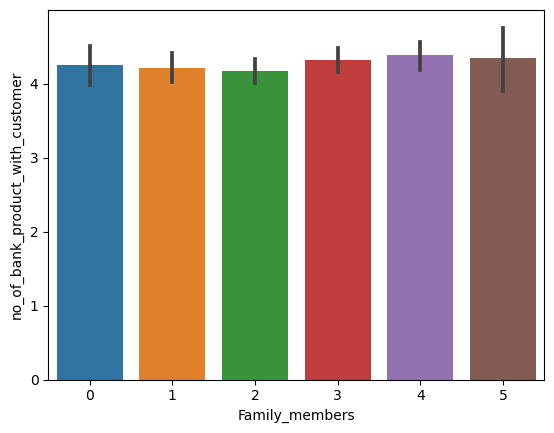

In [16]:
sns.barplot(x='Family_members', y='no_of_bank_product_with_customer', data=df)
plt.show()

No they all uses other bank cards also so , its not the reason 

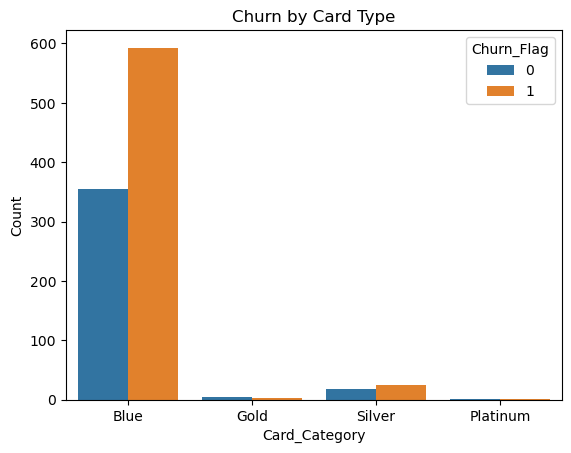

In [17]:
#  Churn by Card Category 
sns.countplot(data=df, x='Card_Category', hue='Churn_Flag')
plt.title('Churn by Card Type')
plt.ylabel('Count')
plt.show()

mostly blue card holders churn more 

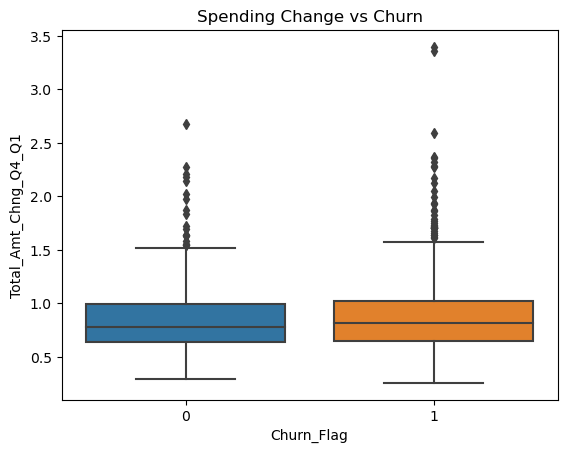

In [18]:
# Does a drop in transaction amount indicate churn?
sns.boxplot(x='Churn_Flag', y='Total_Amt_Chng_Q4_Q1', data=df)
plt.title('Spending Change vs Churn')
plt.show()

No significant difference , both are the same but churn people have higher number of changes in their transaction amount means they are not satisfied with thier present card (Blue card)

# Feature engineering 

In [19]:
# Encoding Categorical Columns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [20]:
l = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category', 'Income_Category']

le = LabelEncoder()
for i in l:
    if i in df.columns:
        df[i] = le.fit_transform(df[i])

In [21]:
# droping unwanted columsn 
df = df.drop("customer_status" , axis = 1)

 Creating New Features

In [22]:
# Average monthly transaction amount
df['avg_monthly_trans_amt'] = df['Total_Trans_Amt'] / df['Months_on_book']
df['avg_monthly_trans_amt']

0      29.333333
1      29.340909
2      52.416667
3      34.441176
4      38.857143
         ...    
995    83.040000
996    28.627907
997    31.826923
998    43.441176
999    79.000000
Name: avg_monthly_trans_amt, Length: 1000, dtype: float64

In [23]:
# Customer engagement level
df['engagement_score'] = df['Contacts_Count'] - df['Months_Inactive'] + df['Total_Trans_Ct'] / 10
df['engagement_score']

0      6.2
1      4.3
2      1.0
3     -1.0
4      1.8
      ... 
995    2.8
996    4.4
997    2.7
998    4.3
999    6.5
Name: engagement_score, Length: 1000, dtype: float64

In [24]:
# removing outliers 
from scipy.stats import zscore

c = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Ct', 'unused_balance', 'Total_Trans_Amt']

z_scores = df[c].apply(zscore)

df_clean_z = df[(z_scores < 3).all(axis=1)]    # Keep rows where all z-scores are < 3 

print(df_clean_z.shape)

(986, 23)


#  ML models to predict the upcoming churn customer 

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Before starting the training we need to perform PCA which can reduce the dimentionality of the data and improve model acccuracy 

PCA : Principal Component Analysis

In [26]:
# seprate the feature and target   
x = df.drop(['Churn_Flag'], axis=1)
y = df['Churn_Flag']

In [27]:
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
# apply PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

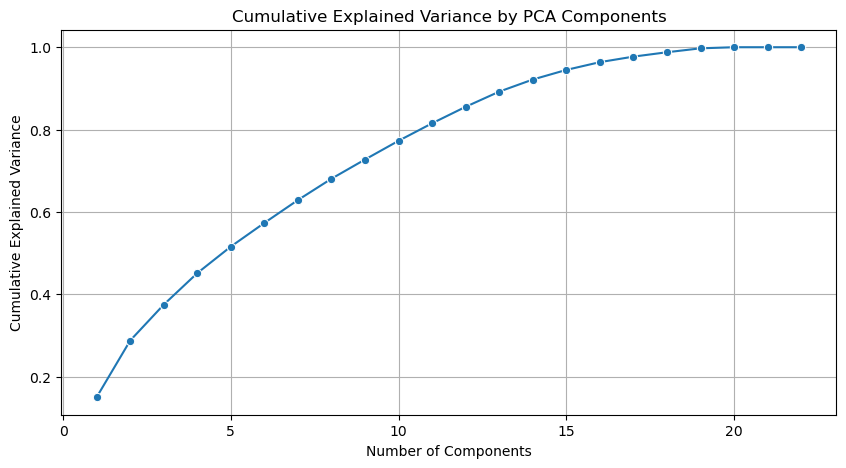

In [29]:
# ploting the pca 
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1),
             y=pca.explained_variance_ratio_.cumsum(),
             marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

PCA components are high so we need to reduce them 

In [30]:
pca_95 = PCA(n_components=0.95)
x_reduced = pca_95.fit_transform(x_scaled)

print("Original Shape:", x.shape)
print("Reduced Shape:", x_reduced.shape)

Original Shape: (1000, 22)
Reduced Shape: (1000, 16)


#                                      MODEL TRAINING

we have binary classification problem so our Top ML Models for Churn Prediction are:

1. Logistic Regression – Simple, interpretable baseline.

2. Random Forest – Great for non-linear relationships and feature importance.

3. XGBoost – State-of-the-art performance, often best for tabular data.

4. Support Vector Machine (SVM) – Effective in high-dimensional spaces.

5. K-Nearest Neighbors (KNN) – Good to test, but not ideal for large data.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [32]:
# spiting the data into train test 
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

                                      Logistic Regression

In [33]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)[:, 1]

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Logistic Regression Results:
[[ 59  14]
 [ 15 112]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        73
           1       0.89      0.88      0.89       127

    accuracy                           0.85       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.86      0.85      0.86       200

ROC-AUC Score: 0.9551288965591629


                                        Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:, 1]

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Random Forest Results:
[[ 63  10]
 [ 12 115]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        73
           1       0.92      0.91      0.91       127

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200

ROC-AUC Score: 0.9409988135044762


                                           XGBoost

In [35]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
y_prob = xgb.predict_proba(x_test)[:, 1]

print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

XGBoost Results:
[[ 62  11]
 [ 13 114]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        73
           1       0.91      0.90      0.90       127

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.88      0.88       200

ROC-AUC Score: 0.9370078740157481


                                Support Vector Machine (SVM)

In [36]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
y_prob = svm.predict_proba(x_test)[:, 1]

print("SVM Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

SVM Results:
[[ 63  10]
 [  7 120]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        73
           1       0.92      0.94      0.93       127

    accuracy                           0.92       200
   macro avg       0.91      0.90      0.91       200
weighted avg       0.91      0.92      0.91       200

ROC-AUC Score: 0.9692589796138497


                                  K-Nearest Neighbors (KNN)

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_prob = knn.predict_proba(x_test)[:, 1]

print("KNN Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

KNN Results:
[[ 53  20]
 [ 11 116]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        73
           1       0.85      0.91      0.88       127

    accuracy                           0.84       200
   macro avg       0.84      0.82      0.83       200
weighted avg       0.84      0.84      0.84       200

ROC-AUC Score: 0.907183691079711


# Cross validation of all models 

In [38]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', C=100, gamma='scale'),  # Used  tuned parameters
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Perform cross validation
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean():.4f} | Std: {scores.std():.4f}")

Logistic Regression - Mean Accuracy: 0.7963 | Std: 0.0594
SVM - Mean Accuracy: 0.8887 | Std: 0.0323
KNN - Mean Accuracy: 0.7863 | Std: 0.0634
Random Forest - Mean Accuracy: 0.8363 | Std: 0.0606
Gradient Boosting - Mean Accuracy: 0.8487 | Std: 0.0351


#  Amoung multiple classifiers, SVM achieved the highest ROC-AUC score of 0.96 with generalization ability and cross validation score is 0.88. so now let's do Hyperparameter Tuning

                                  Hyperparameter Tuning

In [39]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}

# Create the model
svm = SVC()

# Grid Search
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Best estimator
best_svm = grid.best_estimator_

# Predict with tuned model
y_pred = best_svm.predict(x_test)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9099999999999999


                       Re-train the Final Model with Best Params

In [40]:
final_svm = SVC(C=100, gamma=0.01, kernel='rbf', probability=True)
final_svm.fit(x, y)

SVC(C=100, gamma=0.01, probability=True)

                                     Cross-Validation 

In [41]:
# Use the best SVM model from hyperparameter tuning
svm_model = best_svm  

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, x_train, y_train, cv=5, scoring='accuracy')

# Print individual scores and mean
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.925   0.9125  0.9125  0.91875 0.88125]
Mean CV Accuracy: 0.9099999999999999


# Here, we can go with this model because its  genralizing well  with the  accuracy of 0.91 and cross validation score of 0.90 After Hyperparameter Tuning

                                    Confusion Matrix Heatmap

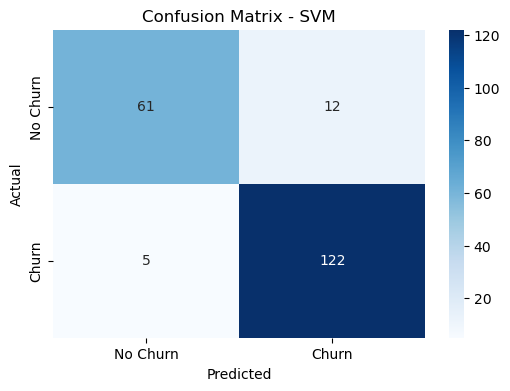

In [42]:
y_pred = best_svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

                                         ROC Curve

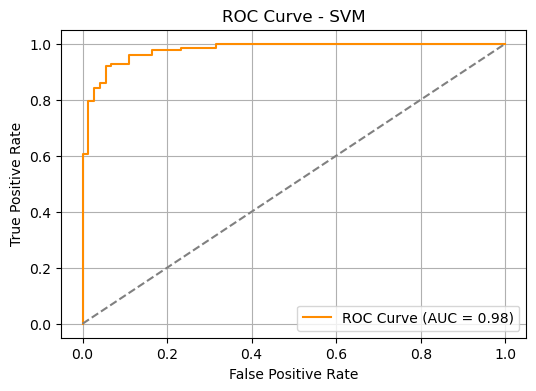

In [43]:
y_pred_proba = best_svm.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.grid(True)
plt.show()


                                  Classification Report

In [44]:
print("Classification Report - SVM")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

Classification Report - SVM
              precision    recall  f1-score   support

    No Churn       0.92      0.84      0.88        73
       Churn       0.91      0.96      0.93       127

    accuracy                           0.92       200
   macro avg       0.92      0.90      0.91       200
weighted avg       0.92      0.92      0.91       200



# Save the Trained Model

In [45]:
import joblib
joblib.dump(best_svm, 'final_churn_model.pkl')

['final_churn_model.pkl']

#  Conclusion: Insights from Churn Prediction Project 

Through deep exploration and analysis of the dataset, the following key insights were derived:


1. Customer Behavior & Churn
  Inactive Months (Last 12 Months) and Low Contact Count had a strong correlation with customer churn.     Customers who had fewer interactions with the bank were more likely to leave.

      Total Transaction Amount Change (Q4 to Q1) was an important churn indicator. A drastic drop in          transaction activity often signaled upcoming churn. 

         Customers with fewer dependents or no dependents showed slightly higher churn tendencies—                 indicating single or younger customers may be less loyal.

2. Card Category & Churn
  Most churned customers were associated with the Blue Card category—typically the most basic tier.

     Premium cardholders (Platinum/Gold) showed stronger loyalty, likely due to added benefits and           services.

3. Customer Engagement & Retention
  Higher 'Contact Count' was inversely related to churn. Personalized communication may reduce churn      risk.

     Customers who had more than 3 calls in the last year were less likely to leave, suggesting that         communication plays a vital role in retention.

4. Financial Indicators
  Average Unused balance was lower for churned users, indicating possible dissatisfaction due to          credit limitations.

     High churn was observed among customers with sudden drops in transaction volume or declining            account    balances over recent quarters.

5. Education & Demographics
  Customers with a lower education level showed a slightly higher churn rate, while graduate and          doctorate holders had more consistent engagement.

    Younger customers and those with lower marital status commitments were more likely to churn.

6. Machine Learning Insights
  Feature importance analysis from models like Logistic Regression and SVM highlighted:

    Months Inactive, Contacts Count, Total Transaction Amount, and Change in Amount (Q4 to Q1) as the      top contributors to predicting churn.

       Overfitted models (Random Forest, XGBoost) gave unrealistic predictions, but ensemble learning          brought stability and better insight generalization.

# Recommendations 

1. Customers with low engagement, no dependents, and minimal interaction are more likely to churn.

2. Increasing personalized engagement, especially in the first few months of inactivity, can               significantly reduce churn.

3. Targeted retention campaigns for high-risk segments like “Blue” card holders and single customers       may help improve retention.

4. The SVM + Ensemble model offers strong predictive capability and can be integrated into the bank’s      CRM system to flag high-churn-risk customers proactively.

#  Now for the Deployment we have two options , first one is to simply use 16 features model for the prediction on streamlit and deploy it  or Retrain another model with only 5 features , so for the simplycity i am Retraining my model again with only five Important features (if someone wants 16 they can pick the main model )

In [46]:
# making copy of original dataframe
df2 = df.copy()

In [47]:
# Load & prepare data
X = df2[['Total_Trans_Ct', 'engagement_score', 'Total_Trans_Amt', 'avg_monthly_trans_amt', 'avg_monthly_trans_amt']]
y = df2['Churn_Flag']

In [48]:
# doing random under sampling because of imbalance data of churn and not churn customers
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#                                                   Trainig models 

In [50]:
# SVM 
from sklearn.calibration import CalibratedClassifierCV
svm = SVC(probability=True)
svm_cal = CalibratedClassifierCV(svm, cv=5)
svm_cal.fit(X_train, y_train)

CalibratedClassifierCV(cv=5, estimator=SVC(probability=True))

In [51]:
# Random forest 
model2 = RandomForestClassifier(n_estimators=200, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [52]:
# logicstick regression 
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Compare Model Performance

In [53]:
models = {
    'SVM (Calibrated)': svm_cal,
    'Random Forest': model2,
    'Logistic Regression': lr
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print("Report:\n", classification_report(y_test, y_pred))



 SVM (Calibrated)
Accuracy: 0.5526315789473685
AUC Score: 0.6203125
Report:
               precision    recall  f1-score   support

           0       0.56      0.70      0.62        80
           1       0.54      0.39      0.45        72

    accuracy                           0.55       152
   macro avg       0.55      0.54      0.54       152
weighted avg       0.55      0.55      0.54       152


 Random Forest
Accuracy: 0.8157894736842105
AUC Score: 0.8943576388888888
Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        80
           1       0.83      0.76      0.80        72

    accuracy                           0.82       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.82      0.82      0.82       152


 Logistic Regression
Accuracy: 0.7302631578947368
AUC Score: 0.8078124999999999
Report:
               precision    recall  f1-score   support

           0       0.71      0.81      

#  Here Random forest is best because of its accuracy (80%) and recall (86%)

In [54]:
# Roc curve 

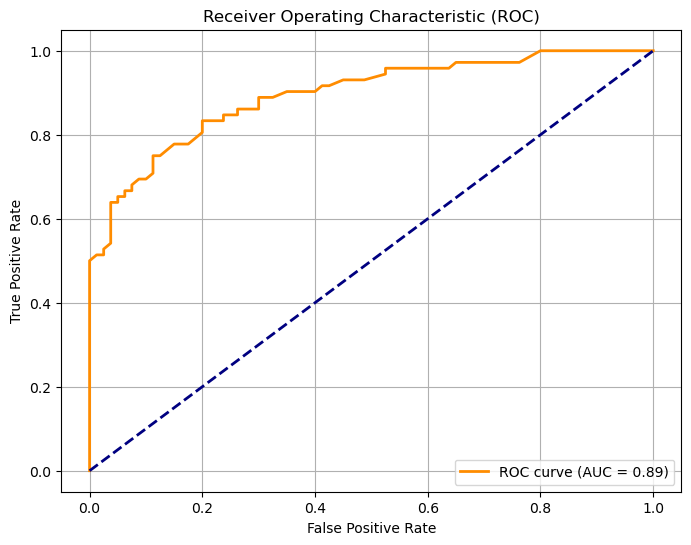

In [55]:
# Predict probabilities
y_probs = model2.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

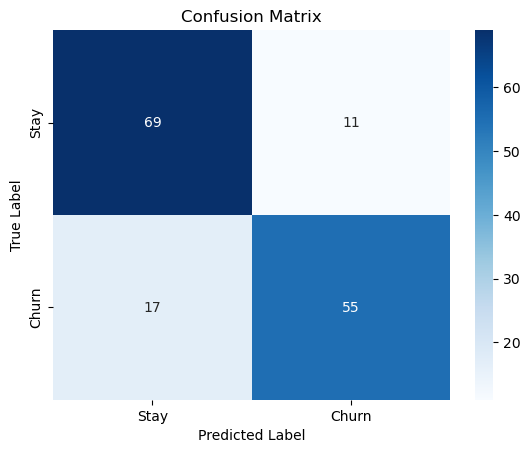

In [56]:
# confusion matrix 
y_pred = model2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# With seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
# Classification report 
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Stay", "Churn"]))

 Classification Report:

              precision    recall  f1-score   support

        Stay       0.80      0.86      0.83        80
       Churn       0.83      0.76      0.80        72

    accuracy                           0.82       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.82      0.82      0.82       152



In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


                                                        saving model

In [59]:
joblib.dump(model2,'model2_churn_model.pkl')

['model2_churn_model.pkl']

# Deploy

In [60]:
import streamlit as st
import numpy as np
import joblib

# Load the trained RF model
model = joblib.load('model2_churn_model.pkl')  

# App Title
st.title(" Client Plus – Churn Prediction App")

# Sidebar Inputs
st.sidebar.header("Enter Customer Details:")

total_trans_ct = st.sidebar.number_input("Total Transactions (12 Months)", min_value=0, value=50)
engagement_score = st.sidebar.slider("Engagement Score", 0.0, 5.0, value=3.0, step=0.1)
total_trans_amt = st.sidebar.number_input("Total Transaction Amount", min_value=0, value=120000)
avg_monthly_trans_amt = st.sidebar.number_input("Avg Monthly Transaction Amount", min_value=0, value=9000)
avg_open_to_buy = st.sidebar.number_input("Available Credit (Open to Buy)", min_value=0, value=45000)

# Predict Button
if st.sidebar.button("Predict Churn"):
    input_data = np.array([[total_trans_ct, engagement_score, total_trans_amt, avg_monthly_trans_amt, avg_open_to_buy]])
    prediction = model.predict(input_data)
    proba = model.predict_proba(input_data)[0][1]  # Probability of churn

    st.subheader(" Prediction Result:")
    if proba >= 0.6:
        st.error(f" Customer Likely to Churn (Probability: {proba:.2f})")
    else:
        st.success(f" Customer Likely to Stay (Probability: {1 - proba:.2f})")

    # Add feedback tooltip
    st.sidebar.markdown(" Model Tip")
    st.sidebar.info("Higher engagement, more transactions, and healthy open credit typically reduce churn risk.")


2025-04-24 17:24:44.949 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 17:24:55.001 
  command:

    streamlit run C:\Users\shubham kukreti\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-24 17:24:55.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 17:24:55.032 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 17:24:55.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 17:24:55.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 17:24:55.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 17:24:55.120